In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import gc

# for dirname, _, filenames in os.walk('/kaggle/working'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# if want to delete the file in output folder

# import os, glob

# for idname in id_train_type0[0:5]:
#     filename = ("/kaggle/working/train_3d_type0/"+idname+"/"+idname+"_xzplane.png")
#     if os.path.isfile(filename):
#         print("Find!")
#         print(os.path.getsize(filename))
# #         os.remove(filename)

# os.remove('./train_3d.zip')

# 1. Loading the training data (original .png + projected .png)

In [4]:
# set train data path
path_train     = '/kaggle/input/phys591000-2022-final-project-ii/fc_train_data/fc_train_data'
df_train = pd.read_csv('/kaggle/input/phys591000-2022-final-project-ii/fc_train_data/fc_train_data/fc_training_list.csv')

label_train_df = np.array(df_train['label'])
id_train_df    = np.array(df_train['id'])

In [5]:
# # this part will be comment when doing train data prediction
# # separate the id with label==1 and label==0
# id_train_type1 = id_train_df[label_train_df==1]
# id_train_type0 = id_train_df[label_train_df==0]

# # random slect the type1 image to let them have eqaul number of data as type0
# import random
# select         = random.sample(range(1207),int(293*1.5))
# id_train_type1 = id_train_type1[select]

# # training data id list and label list
# id_train    = np.hstack((id_train_type1,id_train_type0))
# label_train = np.hstack((np.ones(len(id_train_type1)), np.zeros(len(id_train_type0))))

In [6]:
id_train    = id_train_df[:,np.newaxis]
label_train = label_train_df[:,np.newaxis]

# random order the training data
data = np.hstack((id_train,label_train))
# np.random.shuffle(data)

id_train    = data[:,0]
label_train = data[:,1]

label_train = label_train.astype(int)
label_train = np.eye(2)[label_train]

# add the training data to 4 same list continue to the original one
png_list   = np.hstack((id_train,id_train))
y_train    = np.vstack((label_train,label_train))
png_list   = np.hstack((png_list,id_train))
y_train    = np.vstack((y_train,label_train))
png_list   = np.hstack((png_list,id_train))
y_train    = np.vstack((y_train,label_train))

In [7]:
id_train_df

array(['Trh-F-900008', 'Trh-F-500171', 'Cha-F-200374', ...,
       'Cha-F-000129', '5HT1A-F-100023', '104198-F-300031'], dtype=object)

In [8]:
label_train_df

array([1, 1, 0, ..., 1, 1, 0])

In [9]:
data

array([['Trh-F-900008', 1],
       ['Trh-F-500171', 1],
       ['Cha-F-200374', 0],
       ...,
       ['Cha-F-000129', 1],
       ['5HT1A-F-100023', 1],
       ['104198-F-300031', 0]], dtype=object)

In [10]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

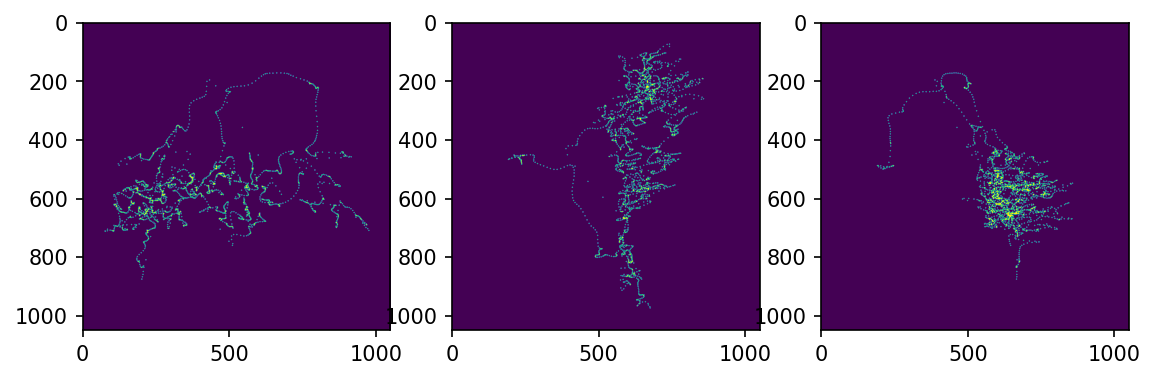

In [11]:
# Checking the projected plane image (with our code)
import matplotlib.pyplot as plt

idname = png_list[0]
savepath = f"/kaggle/input/3dto2d-preimage/train_3d/"

fig = plt.figure(figsize=(9,3), dpi=150)
plt.subplot(1,3,1)
plt.imshow(plt.imread(f"{savepath}/{idname}_xyplane.png"))

plt.subplot(1,3,2)
plt.imshow(plt.imread(f"{savepath}/{idname}_yzplane.png"))

plt.subplot(1,3,3)
plt.imshow(plt.imread(f"{savepath}/{idname}_xzplane.png"))

plt.show()

In [12]:
# loading those .png into (448,448) size with cv2 re-png-size package
# and remember to enlarger the signal(>0.01) to 1 and remove other to 0

import imageio
import glob
from tqdm import tqdm
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2

x_train = np.zeros((len(png_list),448,448), dtype=np.float16)

path_train_png = '/kaggle/input/phys591000-2022-final-project-ii/fc_train_data/fc_train_data/png/'

# original image
for i in tqdm(range(0,len(id_train))):
    im = imageio.imread(path_train_png+png_list[i]+'.png')
    temp = np.array(im[:,:,1:2])
    x_train[i,:,:] = cv2.resize(temp, (448,448))/255.
    
print("Check - The final one image is:", png_list[i])
    
# xy_plane image    
for i in tqdm(range(0,len(id_train))):
    i = i+len(id_train)*1
    
    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/train_3d/{png_list[i]}_xyplane.png")
    x_train[i,:,:] = cv2.resize(im, (448,448))/255. 

print("Check - The final one image is:", png_list[i])
    
# yz_plane image
for i in tqdm(range(0,len(id_train))):
    i = i+len(id_train)*2

    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/train_3d/{png_list[i]}_yzplane.png")
    x_train[i,:,:] = cv2.resize(im, (448,448))/255.

print("Check - The final one image is:", png_list[i])
    
# xz_plane image
for i in tqdm(range(0,len(id_train))):
    i = i+len(id_train)*3

    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/train_3d/{png_list[i]}_xzplane.png")
    x_train[i,:,:] = cv2.resize(im, (448,448))/255
    
print("Check - The final one image is:", png_list[i])

# inorder to enlarge the signal in each pixel(after rescaled by getting png 0~255 signal)
# but have threshold 0.01 to remove the background
# because original 2D .png will have the brain shape background, which will influence represent neuron
import copy
x_train_comp = copy.deepcopy(x_train)
    
x_train[x_train>0.2] = 1
x_train[x_train!=1]  = 0

x_train = x_train[:,:,:,np.newaxis]

del im, temp

100%|██████████| 1500/1500 [01:29<00:00, 16.78it/s]


Check - The final one image is: 104198-F-300031


100%|██████████| 1500/1500 [00:15<00:00, 94.07it/s] 


Check - The final one image is: 104198-F-300031


100%|██████████| 1500/1500 [00:16<00:00, 90.58it/s]


Check - The final one image is: 104198-F-300031


100%|██████████| 1500/1500 [00:16<00:00, 91.11it/s]


Check - The final one image is: 104198-F-300031


before enlarge signal


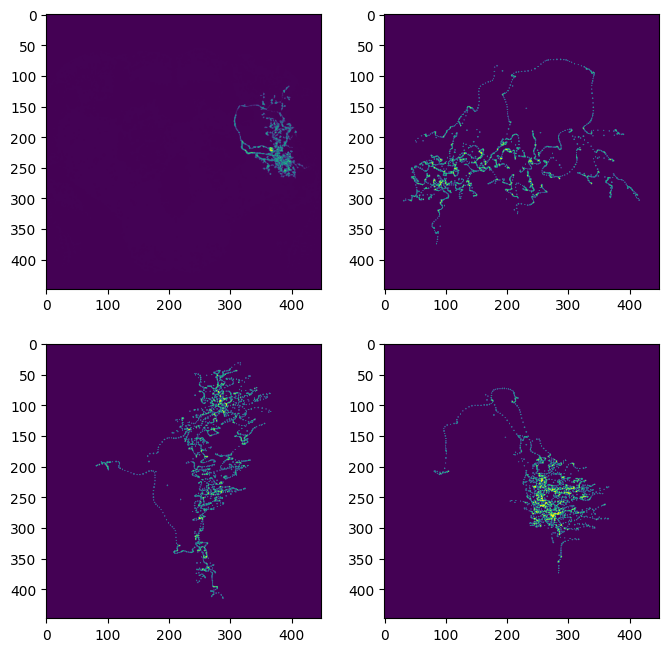

after enlarge signal


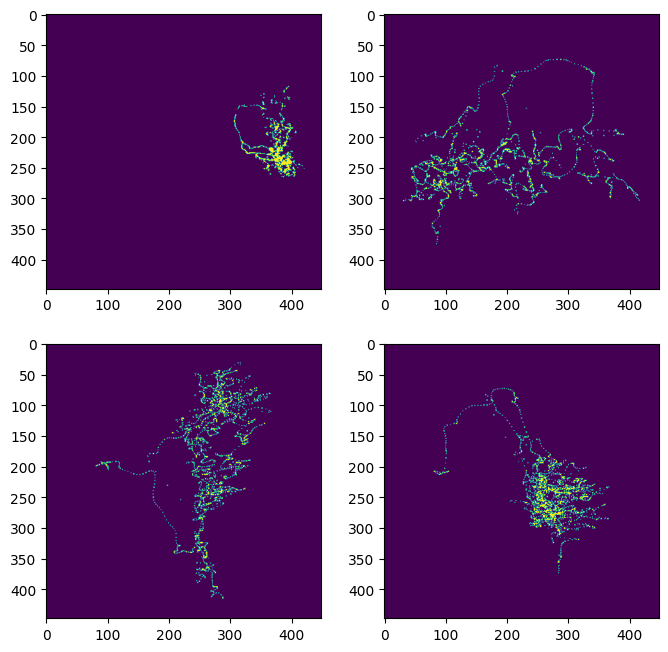

In [13]:
# checking the enlarge effect of signal(>0.01) to 1 and remove other to 0

image_index = 0

print("before enlarge signal")
fig = plt.figure(figsize=(8,8), dpi=100)
for i in [0,1,2,3]:
    plt.subplot(2,2,i+1)
    plt.imshow(x_train_comp[len(id_train)*i+image_index,:,:])
plt.show()

print("after enlarge signal")
fig = plt.figure(figsize=(8,8), dpi=100)
for i in [0,1,2,3]:
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[len(id_train)*i+image_index,:,:])
plt.show()

del x_train_comp

# 2. Loading the testing data (original .png + projected .png)

In [14]:
df_test  = pd.read_csv('/kaggle/input/phys591000-2022-final-project-ii/fc_prediction_template.csv')
id_test     = np.array(df_test['id'])

id_test4 = np.hstack((id_test,id_test))
id_test4 = np.hstack((id_test4,id_test))
id_test4 = np.hstack((id_test4,id_test))
    
x_test = np.zeros((len(id_test4),448,448), dtype=np.float16)

del df_test

In [15]:
# loading those .png into (448,448) size with cv2 re-png-size package
# and remember to enlarger the signal(>0.01) to 1 and remove other to 0

from tqdm import tqdm
import imageio
import cv2

path_test_png = '/kaggle/input/phys591000-2022-final-project-ii/fc_test_data/fc_test_data/png/'

# original image
for i in tqdm(range(len(id_test))):
    im = imageio.imread(path_test_png+id_test[i]+'.png')
    temp = np.array(im[:,:,1:2])
    x_test[i,:,:] = cv2.resize(temp, (448,448))/255.

print("Check - The final one image is:", id_test4[i])

# xy_plane image    
for i in tqdm(range(0,len(id_test))):
    i = i+len(id_test)*1
    
    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/test_3d/{id_test4[i]}_xyplane.png")
    x_test[i,:,:] = cv2.resize(im, (448,448))/255.
    
print("Check - The final one image is:", id_test4[i])
        
# yz_plane image
for i in tqdm(range(0,len(id_test))):
    i = i+len(id_test)*2

    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/test_3d/{id_test4[i]}_yzplane.png")
    x_test[i,:,:] = cv2.resize(im, (448,448))/255.
    
print("Check - The final one image is:", id_test4[i])

# xz_plane image
for i in tqdm(range(0,len(id_test))):
    i = i+len(id_test)*3

    im = imageio.imread(f"/kaggle/input/3dto2d-preimage/test_3d/{id_test4[i]}_xzplane.png")
    x_test[i,:,:] = cv2.resize(im, (448,448))/255.
    
print("Check - The final one image is:", id_test4[i])
    
import copy
x_test_comp = copy.deepcopy(x_test)  
    
x_test[x_test>0.2] = 1
x_test[x_test!=1]  = 0

x_test = x_test.astype(np.int8)
    
x_test = x_test[:,:,:,np.newaxis]

del im, temp, id_test4, path_test_png

100%|██████████| 473/473 [00:29<00:00, 16.19it/s]


Check - The final one image is: npf-M-400018


100%|██████████| 473/473 [00:06<00:00, 75.59it/s]


Check - The final one image is: npf-M-400018


100%|██████████| 473/473 [00:06<00:00, 78.14it/s]


Check - The final one image is: npf-M-400018


100%|██████████| 473/473 [00:07<00:00, 66.97it/s]


Check - The final one image is: npf-M-400018


before enlarge signal


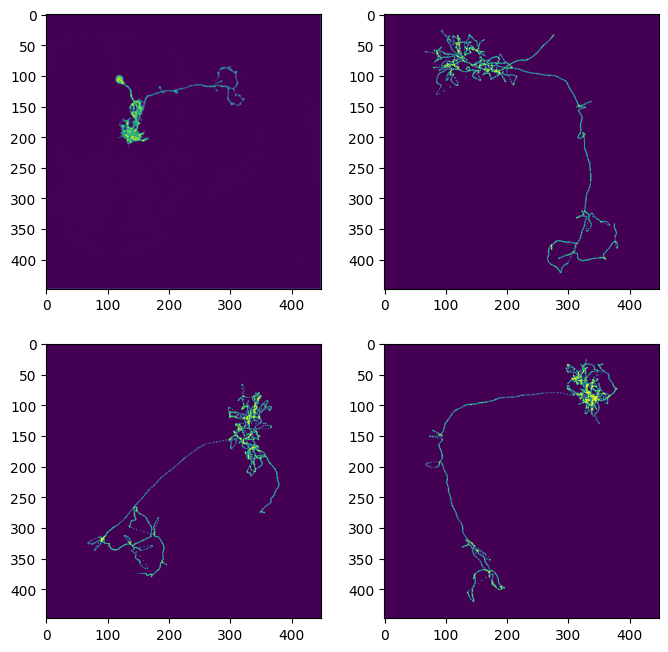

after enlarge signal


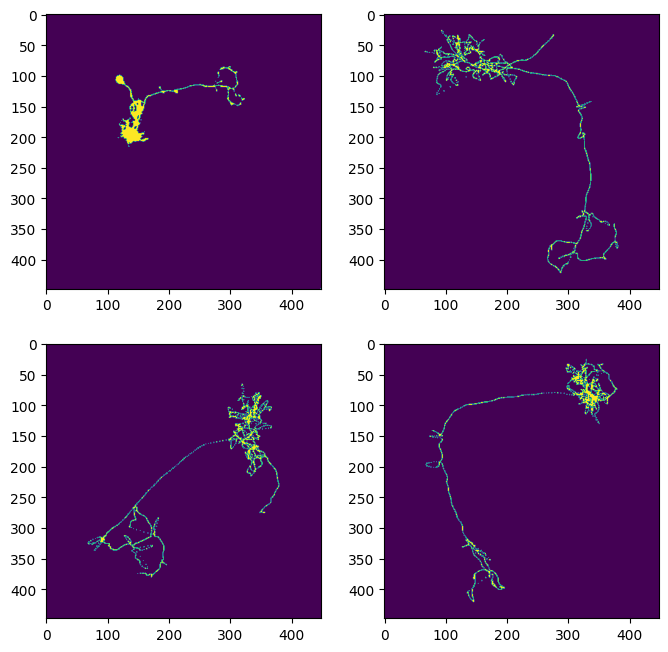

In [16]:
print("before enlarge signal")
fig = plt.figure(figsize=(8,8), dpi=100)
index_show = 100
for i in [0,1,2,3]:
    plt.subplot(2,2,i+1)
    plt.imshow(x_test_comp[len(id_test)*i+index_show,:,:])
plt.show()

print("after enlarge signal")
fig = plt.figure(figsize=(8,8), dpi=100)
for i in [0,1,2,3]:
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[len(id_test)*i+index_show,:,:])
plt.show()

del x_test_comp

# 3. model training

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adadelta
from tensorflow.keras import regularizers
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor="val_loss",min_delta=0.01,patience=50,mode="auto",baseline=None,restore_best_weights=False)

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1,1), strides=(1, 1), activation='relu', input_shape=(448,448,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(64 , activation='relu'))
model.add(Dense(16 , activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0)))
model.add(Dropout(0.1))
model.add(Dense(2  , activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer=Adadelta(),metrics=['accuracy'])
model.summary()
# Train DNN model 
# rec = model.fit(x_train, y_train, epochs=10, batch_size=15,verbose=1,validation_split=0.1)
rec = model.fit(x_train, y_train, epochs=50, batch_size=15,verbose=1,validation_split=0.1)

# Save model
model.save('model_CNN.h5')
del model

2022-05-25 07:14:18.038114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:14:18.145913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:14:18.146711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:14:18.147933: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 448, 448, 32)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 446, 446, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 223, 223, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 3182656)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                203690048 
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0

2022-05-25 07:14:22.570122: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2115420160 exceeds 10% of free system memory.
2022-05-25 07:14:24.742339: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2115420160 exceeds 10% of free system memory.
2022-05-25 07:14:26.306072: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-25 07:14:27.878095: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


176/176 [==============================] - 42s 193ms/step - loss: 2.0397 - accuracy: 0.5366 - val_loss: 1.9853 - val_accuracy: 0.6587
Epoch 2/50
176/176 [==============================] - 32s 183ms/step - loss: 1.9934 - accuracy: 0.6471 - val_loss: 1.9401 - val_accuracy: 0.7611
Epoch 3/50
176/176 [==============================] - 32s 182ms/step - loss: 1.9519 - accuracy: 0.7256 - val_loss: 1.8684 - val_accuracy: 0.8396
Epoch 4/50
176/176 [==============================] - 32s 182ms/step - loss: 1.8727 - accuracy: 0.8019 - val_loss: 1.7768 - val_accuracy: 0.8703
Epoch 5/50
176/176 [==============================] - 32s 182ms/step - loss: 1.7693 - accuracy: 0.8425 - val_loss: 1.7059 - val_accuracy: 0.8669
Epoch 7/50
176/176 [==============================] - 32s 182ms/step - loss: 1.7525 - accuracy: 0.8467 - val_loss: 1.6877 - val_accuracy: 0.8771
Epoch 8/50
176/176 [==============================] - 32s 182ms/step - loss: 1.7375 - accuracy: 0.8486 - val_loss: 1.6762 - val_accuracy: 0.8

2022-05-25 07:41:48.949080: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 814759936 exceeds 10% of free system memory.
2022-05-25 07:41:50.769436: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 814759936 exceeds 10% of free system memory.
2022-05-25 07:41:52.262052: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 814759936 exceeds 10% of free system memory.


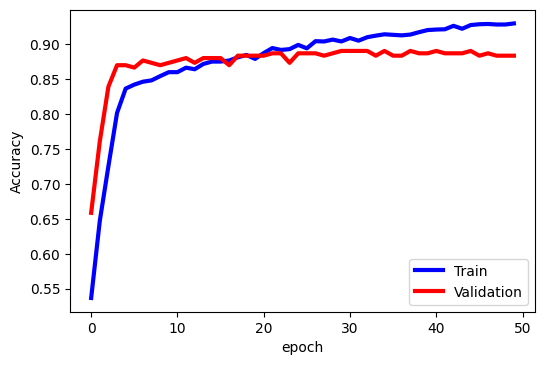

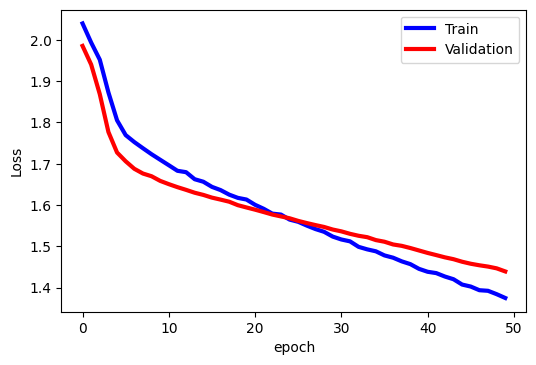

In [17]:
fig = plt.figure(dpi = 100)
plt.plot(rec.history['accuracy'], lw=3, label='Train', color='blue')
plt.plot(rec.history['val_accuracy'], lw=3, label='Validation', color='red')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

fig = plt.figure(dpi = 100)
plt.plot(rec.history['loss'], lw=3, label='Train', color='blue')
plt.plot(rec.history['val_loss'], lw=3, label='Validation', color='red')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

del rec

# 4. prediction

In [17]:
from tensorflow.keras.models import load_model
print("loading model")
model = load_model('model_CNN.h5')
print("loading finish")

# del x_test_comp, x_train_comp

loading model


2022-05-25 07:57:55.175670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:57:55.269655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:57:55.270403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:57:55.272122: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

loading finish


2022-05-25 07:58:10.013655: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 814759936 exceeds 10% of free system memory.


In [18]:
# predict 
# del x_test_comp, x_train_comp

prediction_train = model.predict(x_train)
print("get train predict")

result = np.zeros((len(id_train)*4), dtype=np.int8)
result[prediction_train[:,1]>0.5]=1
print("0 / 1")

result_train  = np.zeros((len(id_train)), dtype=np.int8)
result_train2 = np.zeros((len(id_train)), dtype=np.float16)

for i in range(len(id_train)):
    if i%50==0:
        print(i)
    
    result_train2[i] = (prediction_train[i,1]+prediction_train[i+len(id_train),1]+prediction_train[i+2*len(id_train),1]+prediction_train[i+3*len(id_train),1])/4.
    
    if (result[i]+result[i+len(id_train)]+result[i+2*len(id_train)]+result[i+3*len(id_train)])==0 :
        result_train[i] = 0
    elif (result[i]+result[i+len(id_train)]+result[i+2*len(id_train)]+result[i+3*len(id_train)])==1 :
        result_train[i] = 0
    elif (result[i]+result[i+len(id_train)]+result[i+2*len(id_train)]+result[i+3*len(id_train)])==2 :
        result_train[i] = 1
    elif (result[i]+result[i+len(id_train)]+result[i+2*len(id_train)]+result[i+3*len(id_train)])==3 :
        result_train[i] = 1
    elif (result[i]+result[i+len(id_train)]+result[i+2*len(id_train)]+result[i+3*len(id_train)])==4 :
        result_train[i] = 1
    else:
        print("something wrong")

del result, x_train
   

2022-05-25 07:58:25.716019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-25 07:58:26.876804: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


get train predict
0 / 1
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [19]:
prediction_test = model.predict(x_test)
print("get test predict")
        
result = np.zeros((len(id_test)*4), dtype=np.int8)
result[prediction_test[:,1]>0.5]=1
print("0 / 1")

result_test  = np.zeros((len(id_test)), dtype=np.int8)
result_test2 = np.zeros((len(id_test)), dtype=np.float16)
for i in range(len(id_test)):
    if i%50==0:
        print(i)
    
    result_test2[i] = (prediction_test[i,1]+prediction_test[i+len(id_test),1]+prediction_test[i+2*len(id_test),1]+prediction_test[i+3*len(id_test),1])/4.
    
    if (result[i]+result[i+len(id_test)]+result[i+2*len(id_test)]+result[i+3*len(id_test)])==0 :
        result_test[i] = 0
    elif (result[i]+result[i+len(id_test)]+result[i+2*len(id_test)]+result[i+3*len(id_test)])==1 :
        result_test[i] = 0
    elif (result[i]+result[i+len(id_test)]+result[i+2*len(id_test)]+result[i+3*len(id_test)])==2 :
        result_test[i] = 1
    elif (result[i]+result[i+len(id_test)]+result[i+2*len(id_test)]+result[i+3*len(id_test)])==3 :
        result_test[i] = 1
    elif (result[i]+result[i+len(id_test)]+result[i+2*len(id_test)]+result[i+3*len(id_test)])==4 :
        result_test[i] = 1
    else:
        print("something wrong")
        
del result, x_test

get test predict
0 / 1
0
50
100
150
200
250
300
350
400
450


In [26]:
np.save('test_prediciton_origianl', result_test2)
np.save('test_prediciton_10', result_test)

np.save('train_prediciton_origianl', result_train2)
np.save('train_prediciton_10', result_train)

d = {'id': id_test,
     'prediction': result_test}
df = pd.DataFrame(data=d)

df.to_csv('result.csv', index=0) 